In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['Position_Salaries.csv']


**1. Importing modules needed for the work**

In [2]:
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 
plt.style.use('fivethirtyeight')  
import warnings
warnings.filterwarnings('ignore')  #this will ignore the warnings.it wont display warnings in notebook

**2. Importing the salary data**

In [3]:
dataset=pd.read_csv('../input/Position_Salaries.csv')
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


We can see that the dataset has 10 levels and the corresponding salary paid to the employee.

**3.Making matrix of features and Target **

In [4]:
X=dataset.iloc[:,1:2].values  # For the features we are selecting all the rows of column Level represented by column position 1 or -1 in the data set.
y=dataset.iloc[:,2].values    # for the target we are selecting only the salary column which can be selected using -1 or 2 as the column location in the dataset
#X

Position and the Level of the employee represent the same thing.So in out machine learning model it is sufficient to consider only on feature.In this case we can select the column Level.

**4.Fitting the decision tree to the dataset **

In [5]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(random_state=0) #Default criterian is mse mean square error 
regressor.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

**5.Predicting a new result **

In [6]:
y_pred=regressor.predict([[6.5]])
y_pred

array([150000.])

**6.Visualizing the Decision Tree results **

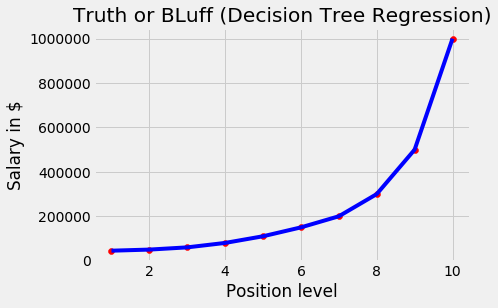

In [7]:
plt.scatter(X,y,color='red')
plt.plot(X,regressor.predict(X),color='blue')
plt.title('Truth or BLuff (Decision Tree Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary in $')
plt.show()

Here we can see that shape of the graph is continous curve.We are seeing non linear and non continous curve.This is not as per the nature of Decision tree algorith.The prediction from Decision tree should be stepwise.This can be resolved by increasing the resolution of the graph.

**7.Visualizing the decision tree with higher resolution **

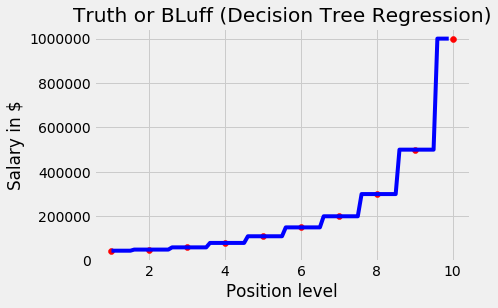

In [8]:
X_grid=np.arange(min(X),max(X),0.1)
X_grid=X_grid.reshape((len(X_grid),1))
plt.scatter(X,y,color='red')
plt.plot(X_grid,regressor.predict(X_grid),color='blue')
plt.title('Truth or BLuff (Decision Tree Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary in $')
plt.show()

**7.1 Increasing rhe resoultion further to makes the lines vertical **

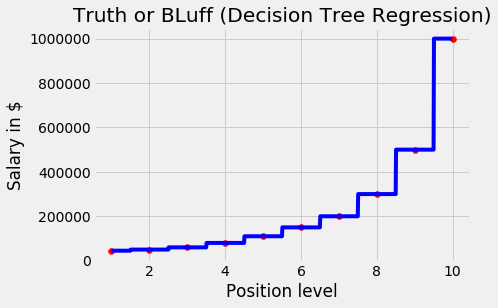

In [9]:
X_grid=np.arange(min(X),max(X),0.01)
X_grid=X_grid.reshape((len(X_grid),1))
plt.scatter(X,y,color='red')
plt.plot(X_grid,regressor.predict(X_grid),color='blue')
plt.title('Truth or BLuff (Decision Tree Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary in $')
plt.show()

We can see that by increasing the resolution we the lines in the desion tree graph have become vertical.